# CPPI - Constant Proportion Portfolio Insurance

Generate convex payoffs without using options. Dynamic allocation of assets. Basic procedure: Allocate to a risky asset
a multiple of the difference of the asset value and the minimum price price. That is cushion and what is I'm willing
to risk.

There is a gap risk with this method if I am not trading frequently. Gap risk materializes if and only if the loss on
the risky portfolio relative to the safe portfolio exceeds 1/m in a trading interval. Calibrate the m as a function of
the maximum potential loss.

A variation could be to use a cap on the wealth (take-gains)

In [30]:
# CCPI implementation, dyamical allocation of wealth.


%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit as erk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


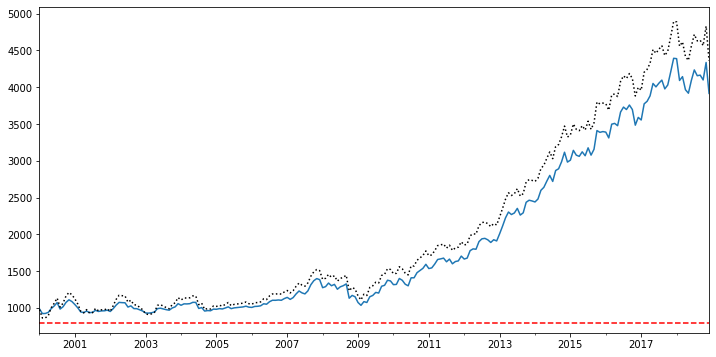

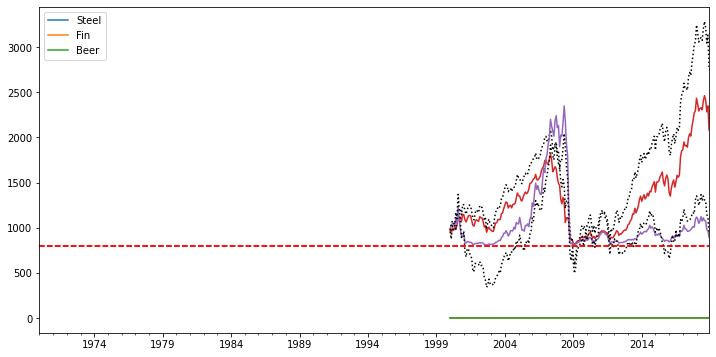

In [43]:
# Risky assets
risky_r = ind_return['2000':][["Steel", "Fin", "Beer"]]

# Safe asset
safe_r = pd.DataFrame().reindex_like(risky_r) #to make a DataFrame similar to another
safe_r.values[:] = 0.03/12

start = 1000
floor = 0.8 # max loss of 20%

floor_value = start*floor
# 1. Cushion - (Asset Value minus Floor Value)
# 2. Compute an Allocation to Safe and Risky Assets --> m*risk budget
# 3. Recompute the Asset Value based on the returns

btr = erk.run_ccpi(risky_r)

account_history = btr['Wealth']
risky_wealth = btr['Risky Wealth']
risky_w_history = btr['Risky Allocation']
ax= account_history['Beer'].plot(figsize=(12, 6))
risky_wealth['Beer'].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

risky_w_history.plot()

ax= account_history['Fin'].plot(figsize=(12, 6))
risky_wealth['Fin'].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

ax= account_history['Steel'].plot(figsize=(12, 6))
risky_wealth['Steel'].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.620132,-0.271368


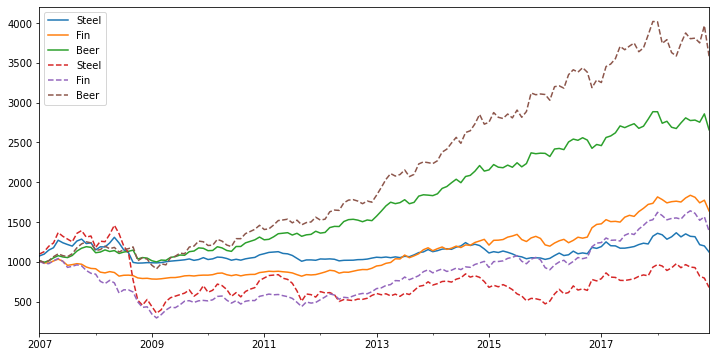

In [49]:
btr = erk.run_ccpi(ind_return["2007":][['Steel', 'Fin', 'Beer']], drawdown=0.25)
ax = btr['Wealth'].plot(figsize=(12, 6))
btr['Risky Wealth'].plot(ax=ax, style='--')

erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

In [55]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.620132,-0.271368


In [56]:
erk.summary_stats(btr['Wealth'].pct_change().dropna())


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.051189,0.613413,-0.161186
